In [1]:
# Import necessary libraries
import yfinance as yf
import matplotlib.pyplot as plt

In [2]:
def plot_etfs_comparison(tickers, start_date, end_date):
    """
    Plot the adjusted closing prices of multiple ETFs over a given period.

    Parameters:
    tickers (list): List of ETF tickers (e.g., ['QQQ', 'SQQQ']).
    start_date (str): Start date in 'YYYY-MM-DD' format.
    end_date (str): End date in 'YYYY-MM-DD' format.
    """
    # Download historical data for the tickers
    data = yf.download(tickers, start=start_date, end=end_date, progress=False)

    # Ensure 'Adj Close' or 'Close' column exists
    if "Adj Close" in data.columns:
        data = data["Adj Close"]
    elif "Close" in data.columns:
        data = data["Close"]
    else:
        raise KeyError("Neither 'Adj Close' nor 'Close' columns found in the data.")

    # Normalize prices to start at 100 for better comparison
    normalized_data = (data / data.iloc[0]) * 100

    # Plot the normalized data
    plt.figure(figsize=(12, 6))
    for ticker in tickers:
        plt.plot(normalized_data[ticker], label=ticker)

    # Add title, labels, legend, and grid
    plt.title("QQQ vs. SQQQ Performance Comparison (2024)", fontsize=16)
    plt.xlabel("Date", fontsize=14)
    plt.ylabel("Normalized Price (Base = 100)", fontsize=14)
    plt.legend(tickers, fontsize=12)
    plt.grid(alpha=0.3)
    plt.show()


In [3]:
# Set the tickers and time range
tickers = ["QQQ", "SQQQ"]
start_date = "2024-01-01"
end_date = "2024-12-31"

In [4]:
# Download and inspect the data structure
data = yf.download(tickers, start=start_date, end=end_date, progress=False)
print(data.head())
print("Columns available:", data.columns)

Price            Close                   High                    Low  \
Ticker             QQQ       SQQQ         QQQ       SQQQ         QQQ   
Date                                                                   
2024-01-02  400.211670  65.996315  403.690993  67.116483  397.875547   
2024-01-03  395.976837  68.096611  398.631077  68.376655  395.539464   
2024-01-04  393.938965  69.263451  397.229409  69.403473  393.720263   
2024-01-05  394.406158  69.076767  397.199556  69.823546  393.004485   
2024-01-08  402.557770  64.829475  402.846035  68.563355  395.489756   

Price                        Open               Volume            
Ticker           SQQQ         QQQ       SQQQ       QQQ      SQQQ  
Date                                                              
2024-01-02  64.362743  403.442470  64.456095  58026900  25375640  
2024-01-03  66.836428  397.567391  67.349840  47002800  26349500  
2024-01-04  67.583209  394.098023  69.263451  39432800  22547240  
2024-01-05  67.629886

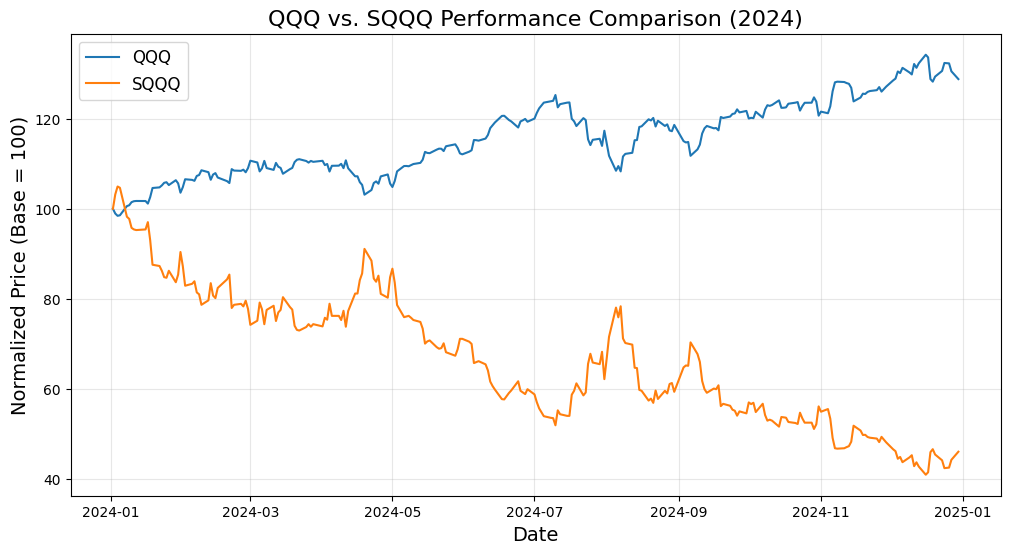

In [5]:
# Call the function to plot the comparison
plot_etfs_comparison(tickers, start_date, end_date)